#Обработка пропусков в данных, кодирование категориальных признаков, масштабирование данных.

# Загрузка и первичный анализ данных

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.impute
import sklearn.preprocessing
%matplotlib inline 
sns.set(style="ticks")

In [2]:
# Будем анализировать данные только на обучающей выборке
data = pd.read_csv('IMDB_movie_reviews_details.csv', sep=",")

In [3]:
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

In [4]:
# Первые 5 строк датасета
data.head()

,Unnamed: 0,name,year,runtime,genre,rating,metascore,timeline,votes,gross
0,0,The Shawshank Redemption,1994,142,Drama,9.3,80.0,Two imprisoned men bond over a number of years...,"2,394,059",$28.34M
1,1,The Godfather,1972,175,"Crime, Drama",9.2,100.0,An organized crime dynasty's aging patriarch t...,"1,658,439",$134.97M
2,2,Soorarai Pottru,2020,153,Drama,9.1,NaN,"Nedumaaran Rajangam ""Maara"" sets out to make t...","78,266",NaN
3,3,The Dark Knight,2008,152,"Action, Crime, Drama",9.0,84.0,When the menace known as the Joker wreaks havo...,"2,355,907",$534.86M
4,4,The Godfather: Part II,1974,202,"Crime, Drama",9.0,90.0,The early life and career of Vito Corleone in ...,"1,152,912",$57.30M


In [5]:
total_count = data.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 1000


In [6]:
# типы колонок
data.dtypes

Unnamed: 0      int64
name           object
year           object
runtime         int64
genre          object
rating        float64
metascore     float64
timeline       object
votes          object
gross          object
dtype: object

In [7]:
# размер набора данных
data.shape

(1000, 10)

# Обработка пропусков в данных

In [8]:
# проверим есть ли пропущенные значения
data.isnull().sum()

Unnamed: 0      0
name            0
year            0
runtime         0
genre           0
rating          0
metascore     159
timeline        0
votes           0
gross         171
dtype: int64

In [9]:
# Удаление колонок, содержащих пустые значения
data_new_1 = data.dropna(axis=1, how='any')
(data.shape, data_new_1.shape)

((1000, 10), (1000, 8))

In [10]:
data_new_1.columns

Index(['Unnamed: 0', 'name', 'year', 'runtime', 'genre', 'rating', 'timeline',
       'votes'],
      dtype='object')

In [11]:
# Удаление строк, содержащих пустые значения
data_new_2 = data.dropna(axis=0, how='any')
(data.shape, data_new_2.shape)

((1000, 10), (747, 10))

In [12]:
# Найдем пропуски в данных в процентном соотношении
for col in data.columns:
    pct_missing = np.mean(data[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Unnamed: 0 - 0%
name - 0%
year - 0%
runtime - 0%
genre - 0%
rating - 0%
metascore - 16%
timeline - 0%
votes - 0%
gross - 17%


In [13]:
data[data.columns].isnull()

,Unnamed: 0,name,year,runtime,genre,rating,metascore,timeline,votes,gross
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,True
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False,False,True
996,False,False,False,False,False,False,False,False,False,True
997,False,False,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False,False,False


<AxesSubplot:>

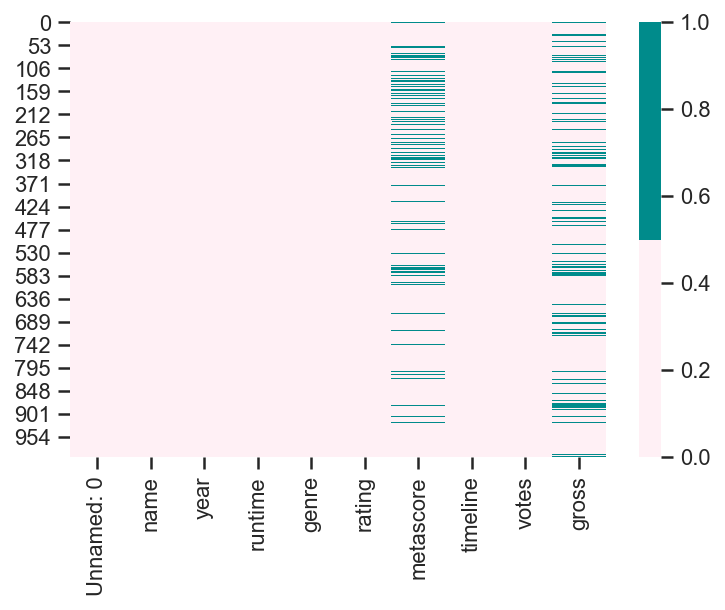

In [17]:
# Видим, что с заполнением пропусков нужно работать в колонке Rating
colors = ['#FFF0F5', '#008B8B']
sns.heatmap(data[data.columns].isnull(), cmap=sns.color_palette(colors))

<AxesSubplot:xlabel='metascore', ylabel='Density'>

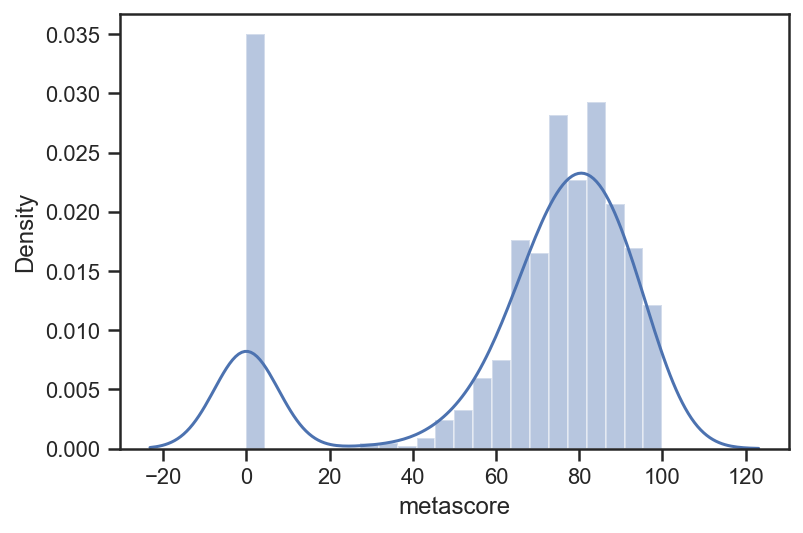

In [19]:
# Заполним пропуски в колонке нулями
sns.distplot(data['metascore'].fillna(0))

C:\Users\svetl\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

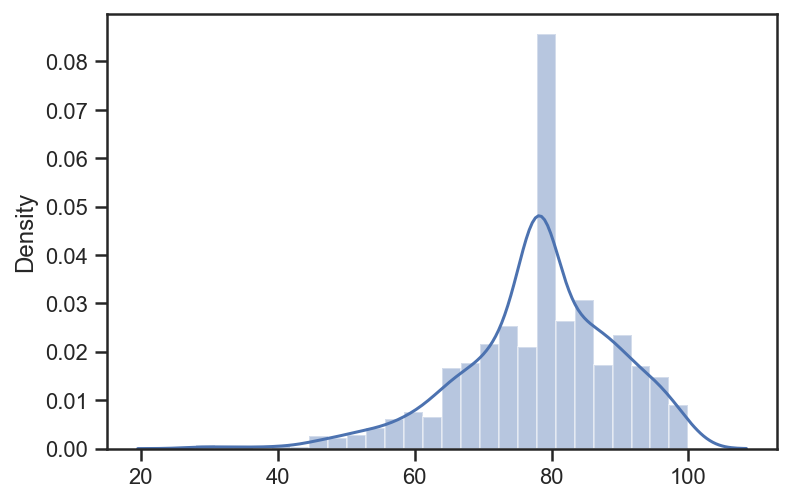

In [20]:
# Получили выброс в значении 0
# С помощью класса SimpleImputer можно проводить импьютацию различными показателями центра распределения
# Применим заполнение средними значениями
mean=sklearn.impute.SimpleImputer(strategy="mean")
mean_rate=mean.fit_transform(data[['metascore']])
sns.distplot(mean_rate)

C:\Users\svetl\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

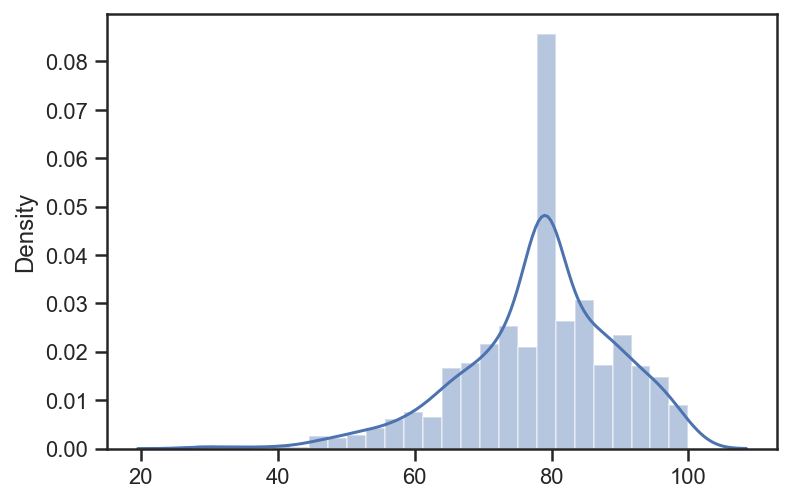

In [21]:
med=sklearn.impute.SimpleImputer(strategy="median")
med_rate=med.fit_transform(data[['metascore']])
sns.distplot(med_rate)

C:\Users\svetl\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

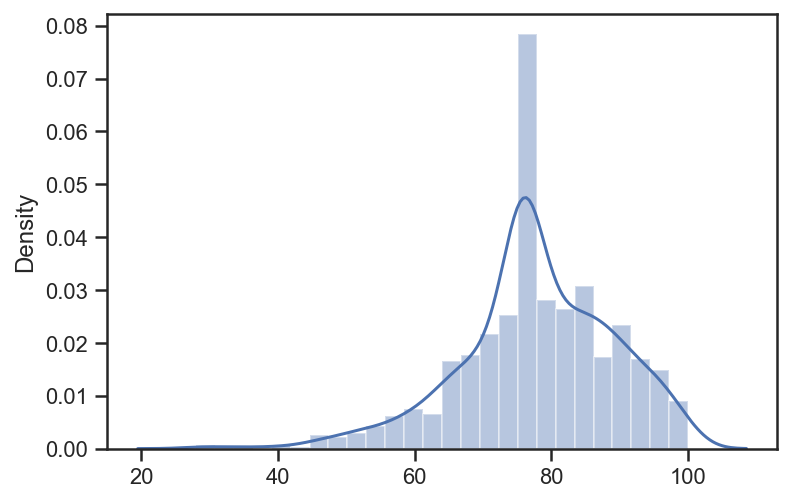

In [22]:
freq=sklearn.impute.SimpleImputer(strategy="most_frequent")
freq_rate=freq.fit_transform(data[['metascore']])
sns.distplot(freq_rate)

In [23]:
# Остановим выбор на средних значениях
data['metascore'] = mean_rate

**Обработка пропусков в категориальных данных**

In [24]:
# Выберем категориальные колонки с пропущенными значениями
# Цикл по колонкам датасета
cat_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='object'):
        cat_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка gross. Тип данных object. Количество пустых значений 171, 17.1%.


In [25]:
cat_temp_data = data[['gross']]
cat_temp_data.head()

,gross
0,$28.34M
1,$134.97M
2,NaN
3,$534.86M
4,$57.30M


In [26]:
cat_temp_data['gross'].unique()

array(['$28.34M', '$134.97M', nan, '$534.86M', '$57.30M', '$4.36M',
       '$377.85M', '$107.93M', '$96.90M', '$292.58M', '$37.03M',
       '$315.54M', '$330.25M', '$6.10M', '$342.55M', '$171.48M',
       '$46.84M', '$290.48M', '$112.00M', '$53.37M', '$188.02M', '$7.56M',
       '$10.06M', '$216.54M', '$136.80M', '$57.60M', '$100.13M',
       '$130.74M', '$322.74M', '$0.27M', '$13.09M', '$13.18M', '$53.09M',
       '$132.38M', '$32.57M', '$187.71M', '$6.72M', '$23.34M', '$19.50M',
       '$422.78M', '$204.84M', '$11.99M', '$210.61M', '$5.32M', '$32.00M',
       '$36.76M', '$1.02M', '$0.16M', '$0.02M', '$1.66M', '$335.45M',
       '$5.02M', '$12.39M', '$190.24M', '$858.37M', '$678.82M',
       '$209.73M', '$162.81M', '$448.14M', '$6.53M', '$1.22M', '$223.81M',
       '$11.29M', '$0.71M', '$25.54M', '$2.38M', '$248.16M', '$44.02M',
       '$83.47M', '$78.90M', '$0.28M', '$8.18M', '$0.29M', '$0.90M',
       '$159.23M', '$0.69M', '$7.10M', '$6.86M', '$120.54M', '$34.40M',
       '$33.23M',

In [27]:
cat_temp_data[cat_temp_data['gross'].isnull()]

,gross
2,NaN
29,NaN
31,NaN
32,NaN
33,NaN
...,...
987,NaN
992,NaN
995,NaN
996,NaN


In [28]:
# Импьютация наиболее частыми значениями
imp2 = sklearn.impute.SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data_imp2 = imp2.fit_transform(cat_temp_data)
data_imp2

array([['$28.34M'],
       ['$134.97M'],
       ['$0.01M'],
       ['$534.86M'],
       ['$57.30M'],
       ['$4.36M'],
       ['$377.85M'],
       ['$107.93M'],
       ['$96.90M'],
       ['$292.58M'],
       ['$37.03M'],
       ['$315.54M'],
       ['$330.25M'],
       ['$6.10M'],
       ['$342.55M'],
       ['$171.48M'],
       ['$46.84M'],
       ['$290.48M'],
       ['$112.00M'],
       ['$53.37M'],
       ['$188.02M'],
       ['$7.56M'],
       ['$10.06M'],
       ['$216.54M'],
       ['$136.80M'],
       ['$57.60M'],
       ['$100.13M'],
       ['$130.74M'],
       ['$322.74M'],
       ['$0.01M'],
       ['$0.27M'],
       ['$0.01M'],
       ['$0.01M'],
       ['$0.01M'],
       ['$13.09M'],
       ['$13.18M'],
       ['$53.09M'],
       ['$132.38M'],
       ['$32.57M'],
       ['$187.71M'],
       ['$6.72M'],
       ['$23.34M'],
       ['$19.50M'],
       ['$422.78M'],
       ['$204.84M'],
       ['$11.99M'],
       ['$0.01M'],
       ['$210.61M'],
       ['$5.32M'],
       ['$

In [29]:
# Пустые значения отсутствуют
np.unique(data_imp2)

array(['$0.00M', '$0.01M', '$0.02M', '$0.03M', '$0.04M', '$0.05M',
       '$0.06M', '$0.07M', '$0.08M', '$0.09M', '$0.10M', '$0.11M',
       '$0.13M', '$0.14M', '$0.15M', '$0.16M', '$0.17M', '$0.18M',
       '$0.19M', '$0.20M', '$0.23M', '$0.24M', '$0.26M', '$0.27M',
       '$0.28M', '$0.29M', '$0.30M', '$0.31M', '$0.33M', '$0.34M',
       '$0.35M', '$0.37M', '$0.41M', '$0.44M', '$0.45M', '$0.50M',
       '$0.52M', '$0.54M', '$0.55M', '$0.57M', '$0.58M', '$0.60M',
       '$0.65M', '$0.68M', '$0.69M', '$0.70M', '$0.71M', '$0.73M',
       '$0.74M', '$0.75M', '$0.77M', '$0.78M', '$0.86M', '$0.87M',
       '$0.88M', '$0.90M', '$0.92M', '$0.93M', '$0.96M', '$0.98M',
       '$0.99M', '$1.00M', '$1.01M', '$1.02M', '$1.03M', '$1.04M',
       '$1.05M', '$1.06M', '$1.08M', '$1.09M', '$1.11M', '$1.12M',
       '$1.19M', '$1.22M', '$1.23M', '$1.24M', '$1.32M', '$1.33M',
       '$1.34M', '$1.37M', '$1.38M', '$1.43M', '$1.44M', '$1.46M',
       '$1.48M', '$1.50M', '$1.51M', '$1.53M', '$1.54M', '$1.5

In [30]:
# Импьютация константой
imp3 = sklearn.impute.SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='NA')
data_imp3 = imp3.fit_transform(cat_temp_data)
data_imp3

array([['$28.34M'],
       ['$134.97M'],
       ['NA'],
       ['$534.86M'],
       ['$57.30M'],
       ['$4.36M'],
       ['$377.85M'],
       ['$107.93M'],
       ['$96.90M'],
       ['$292.58M'],
       ['$37.03M'],
       ['$315.54M'],
       ['$330.25M'],
       ['$6.10M'],
       ['$342.55M'],
       ['$171.48M'],
       ['$46.84M'],
       ['$290.48M'],
       ['$112.00M'],
       ['$53.37M'],
       ['$188.02M'],
       ['$7.56M'],
       ['$10.06M'],
       ['$216.54M'],
       ['$136.80M'],
       ['$57.60M'],
       ['$100.13M'],
       ['$130.74M'],
       ['$322.74M'],
       ['NA'],
       ['$0.27M'],
       ['NA'],
       ['NA'],
       ['NA'],
       ['$13.09M'],
       ['$13.18M'],
       ['$53.09M'],
       ['$132.38M'],
       ['$32.57M'],
       ['$187.71M'],
       ['$6.72M'],
       ['$23.34M'],
       ['$19.50M'],
       ['$422.78M'],
       ['$204.84M'],
       ['$11.99M'],
       ['NA'],
       ['$210.61M'],
       ['$5.32M'],
       ['$32.00M'],
       ['$36.7

In [31]:
np.unique(data_imp3)

array(['$0.00M', '$0.01M', '$0.02M', '$0.03M', '$0.04M', '$0.05M',
       '$0.06M', '$0.07M', '$0.08M', '$0.09M', '$0.10M', '$0.11M',
       '$0.13M', '$0.14M', '$0.15M', '$0.16M', '$0.17M', '$0.18M',
       '$0.19M', '$0.20M', '$0.23M', '$0.24M', '$0.26M', '$0.27M',
       '$0.28M', '$0.29M', '$0.30M', '$0.31M', '$0.33M', '$0.34M',
       '$0.35M', '$0.37M', '$0.41M', '$0.44M', '$0.45M', '$0.50M',
       '$0.52M', '$0.54M', '$0.55M', '$0.57M', '$0.58M', '$0.60M',
       '$0.65M', '$0.68M', '$0.69M', '$0.70M', '$0.71M', '$0.73M',
       '$0.74M', '$0.75M', '$0.77M', '$0.78M', '$0.86M', '$0.87M',
       '$0.88M', '$0.90M', '$0.92M', '$0.93M', '$0.96M', '$0.98M',
       '$0.99M', '$1.00M', '$1.01M', '$1.02M', '$1.03M', '$1.04M',
       '$1.05M', '$1.06M', '$1.08M', '$1.09M', '$1.11M', '$1.12M',
       '$1.19M', '$1.22M', '$1.23M', '$1.24M', '$1.32M', '$1.33M',
       '$1.34M', '$1.37M', '$1.38M', '$1.43M', '$1.44M', '$1.46M',
       '$1.48M', '$1.50M', '$1.51M', '$1.53M', '$1.54M', '$1.5

In [32]:
data_imp3[data_imp3=='NA'].size

171

In [33]:
data['gross'] = data_imp2

In [34]:
data['gross'].unique()

array(['$28.34M', '$134.97M', '$0.01M', '$534.86M', '$57.30M', '$4.36M',
       '$377.85M', '$107.93M', '$96.90M', '$292.58M', '$37.03M',
       '$315.54M', '$330.25M', '$6.10M', '$342.55M', '$171.48M',
       '$46.84M', '$290.48M', '$112.00M', '$53.37M', '$188.02M', '$7.56M',
       '$10.06M', '$216.54M', '$136.80M', '$57.60M', '$100.13M',
       '$130.74M', '$322.74M', '$0.27M', '$13.09M', '$13.18M', '$53.09M',
       '$132.38M', '$32.57M', '$187.71M', '$6.72M', '$23.34M', '$19.50M',
       '$422.78M', '$204.84M', '$11.99M', '$210.61M', '$5.32M', '$32.00M',
       '$36.76M', '$1.02M', '$0.16M', '$0.02M', '$1.66M', '$335.45M',
       '$5.02M', '$12.39M', '$190.24M', '$858.37M', '$678.82M',
       '$209.73M', '$162.81M', '$448.14M', '$6.53M', '$1.22M', '$223.81M',
       '$11.29M', '$0.71M', '$25.54M', '$2.38M', '$248.16M', '$44.02M',
       '$83.47M', '$78.90M', '$0.28M', '$8.18M', '$0.29M', '$0.90M',
       '$159.23M', '$0.69M', '$7.10M', '$6.86M', '$120.54M', '$34.40M',
       '$33.

# Кодирование категориальных признаков

In [35]:
types=data["gross"]
types.value_counts()

$0.01M      179
$0.06M        5
$0.17M        5
$4.36M        5
$0.05M        4
           ... 
$6.86M        1
$292.58M      1
$32.39M       1
$18.35M       1
$305.41M      1
Name: gross, Length: 729, dtype: int64

**Кодирование категорий целочисленными значениями - label encoding**



In [36]:
le=sklearn.preprocessing.LabelEncoder()
type_le=le.fit_transform(types)
print(np.unique(type_le))
le.inverse_transform(np.unique(type_le))

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 24

array(['$0.00M', '$0.01M', '$0.02M', '$0.03M', '$0.04M', '$0.05M',
       '$0.06M', '$0.07M', '$0.08M', '$0.09M', '$0.10M', '$0.11M',
       '$0.13M', '$0.14M', '$0.15M', '$0.16M', '$0.17M', '$0.18M',
       '$0.19M', '$0.20M', '$0.23M', '$0.24M', '$0.26M', '$0.27M',
       '$0.28M', '$0.29M', '$0.30M', '$0.31M', '$0.33M', '$0.34M',
       '$0.35M', '$0.37M', '$0.41M', '$0.44M', '$0.45M', '$0.50M',
       '$0.52M', '$0.54M', '$0.55M', '$0.57M', '$0.58M', '$0.60M',
       '$0.65M', '$0.68M', '$0.69M', '$0.70M', '$0.71M', '$0.73M',
       '$0.74M', '$0.75M', '$0.77M', '$0.78M', '$0.86M', '$0.87M',
       '$0.88M', '$0.90M', '$0.92M', '$0.93M', '$0.96M', '$0.98M',
       '$0.99M', '$1.00M', '$1.01M', '$1.02M', '$1.03M', '$1.04M',
       '$1.05M', '$1.06M', '$1.08M', '$1.09M', '$1.11M', '$1.12M',
       '$1.19M', '$1.22M', '$1.23M', '$1.24M', '$1.32M', '$1.33M',
       '$1.34M', '$1.37M', '$1.38M', '$1.43M', '$1.44M', '$1.46M',
       '$1.48M', '$1.50M', '$1.51M', '$1.53M', '$1.54M', '$1.5

**Pandas get_dummies - быстрый вариант one-hot кодирования**

In [37]:
type_s=pd.get_dummies(types)
type_s.head(25)

,$0.00M,$0.01M,$0.02M,$0.03M,$0.04M,$0.05M,$0.06M,$0.07M,$0.08M,$0.09M,...,$92.05M,$92.82M,$93.62M,$93.74M,$936.66M,$95.86M,$96.52M,$96.90M,$96.96M,$98.47M
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Переходим  к масштабированию данных.**

Масштабирование предполагает изменение диапазона измерения величины, а нормализация - изменение распределения этой величины.

Если признаки лежат в различных диапазонах, то необходимо их нормализовать. Как правило, применяют два следующих подхода:


# MinMax масштабирование

In [38]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [39]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data[['metascore']])

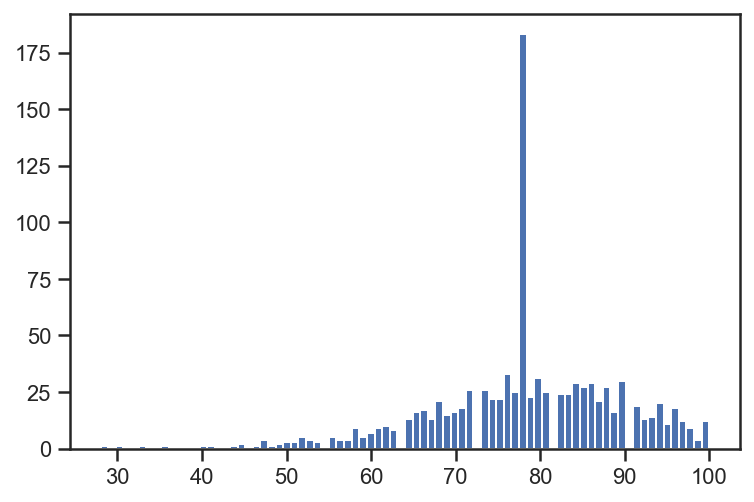

In [40]:
plt.hist(data['metascore'], 80)
plt.show()

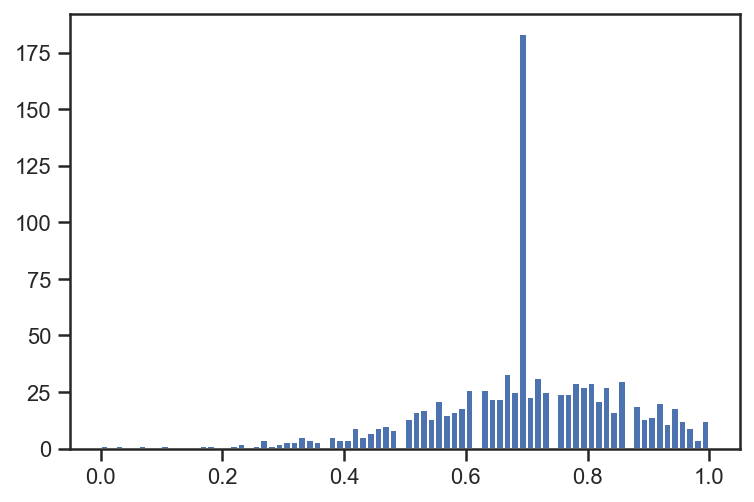

In [41]:
plt.hist(sc1_data, 80)
plt.show()

# Масштабирование данных на основе Z-оценки - StandardScaler

In [42]:
sc2 = StandardScaler()
sc2_data = sc2.fit_transform(data[['metascore']])

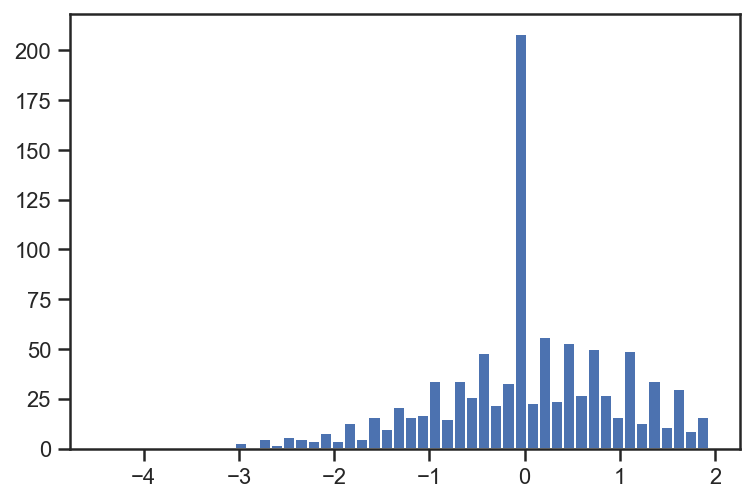

In [43]:
plt.hist(sc2_data, 50)
plt.show()